In [1]:
import pandas as pd
#Importing all required libraries
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

#Plotting Plots
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
import pandas as pd
df = pd.read_csv("/Users/Arjun D H/Documents/health_facilities_gh.csv",engine='python',encoding='utf-8')

In [3]:
df.head(5)

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098


In [4]:
df.columns

Index(['Region', 'District', 'FacilityName', 'Type', 'Town', 'Ownership',
       'Latitude', 'Longitude'],
      dtype='object')

In [5]:
df.isnull().sum()

Region            0
District          0
FacilityName      0
Type              0
Town            153
Ownership         0
Latitude         24
Longitude        24
dtype: int64

In [6]:
df.shape

(3756, 8)

In [7]:
Facility_Name= df['FacilityName'].dropna()

In [9]:
Facility_Name=Facility_Name.tolist()

In [11]:
print(Facility_Name[0])

A.M.E Zion Clinic


In [12]:
print(len(Facility_Name))

3756


In [13]:
def findProgramFacilityName(ProgramFacilityName):
    requiredProgramFacilityName = []
    for i in Facility_Name:
        if(ProgramFacilityName in i):
            requiredProgramFacilityName.append(i)
    return(len(Facility_Name))  

In [14]:
findProgramFacilityName("A.M.E Zion Clinic")

3756

In [17]:
top5Program_facility = df['FacilityName'].value_counts()
top5Program_facility[0:5]

Rabito Clinic            11
Adom Maternity Home       7
Salvation Army Clinic     6
SDA Hospital              6
Police Clinic             6
Name: FacilityName, dtype: int64

In [19]:
top10Region= df['Region'].value_counts()
top10Region[0:10]

Ashanti          658
Greater Accra    504
Western          496
Volta            398
Eastern          393
Brong Ahafo      348
Central          299
Northern         267
Upper East       232
Upper West       161
Name: Region, dtype: int64

In [20]:
top10District = df['District'].value_counts()
top10District[0:10]

Accra Metropolitan     277
Kumasi Metropolitan    263
Tema Metropolitan      118
Shama Ahanta East       71
Ho Municipal            51
Bia                     49
Ketu                    47
Ga East                 45
Hohoe                   42
Juabeso                 41
Name: District, dtype: int64

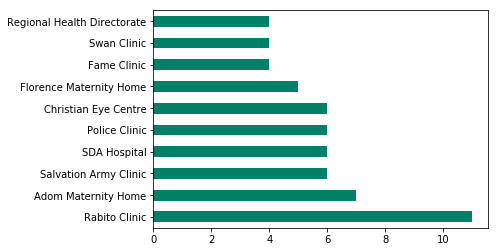

In [21]:
df['FacilityName'].value_counts()[:10].plot(kind='barh',colormap='summer')

In [22]:
top5Ownership = df['Ownership'].value_counts()
top5Ownership= top5Ownership[0:5]
print(type(top5Ownership))

<class 'pandas.core.series.Series'>


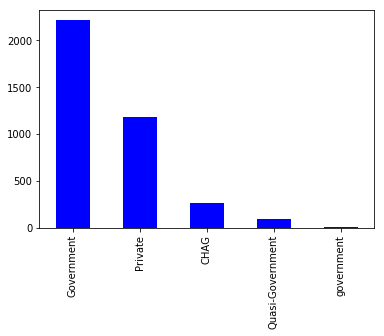

In [23]:
top5Ownership.plot.bar(stacked=True, colormap='winter')

In [25]:
top5Facility_Name = df['FacilityName'].value_counts()
top5Facility_Name[0:5]

Rabito Clinic            11
Adom Maternity Home       7
Salvation Army Clinic     6
SDA Hospital              6
Police Clinic             6
Name: FacilityName, dtype: int64

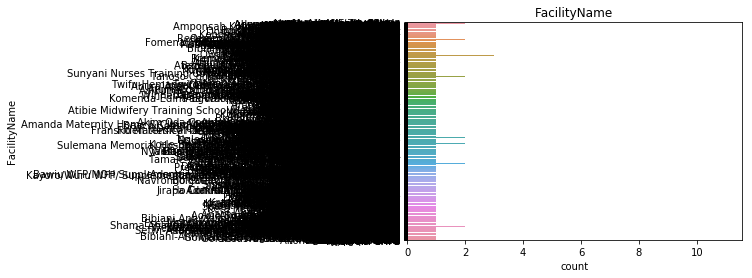

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y="FacilityName", data=df)
plt.title("FacilityName")

plt.show()

In [28]:
diffFacility_Name= df['FacilityName'].dropna()

In [31]:
diffFacility_Name.value_counts()

Rabito Clinic                                     11
Adom Maternity Home                                7
Salvation Army Clinic                              6
SDA Hospital                                       6
Police Clinic                                      6
Christian Eye Centre                               6
Florence Maternity Home                            5
Fame Clinic                                        4
Swan Clinic                                        4
Regional Health Directorate                        4
Peace Clinic                                       3
Adom Clinic                                        3
Market Clinic                                      3
Bethel Maternity Home                              3
Agyenkwa Clinic                                    3
Ghacem Clinic                                      3
Holy Family Hospital                               3
Comfort Maternity Home                             3
Church of Pentecost Clinic                    

In [29]:
dfDistrict = df['District'].value_counts()
dfDistrict = dfDistrict[0:10]

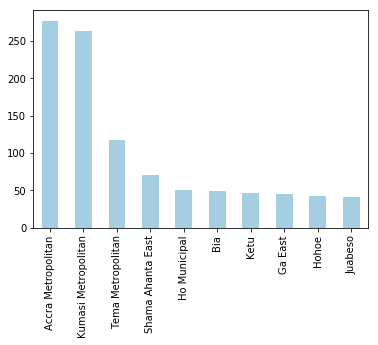

In [30]:
dfDistrict.plot.bar(stacked=True, colormap='Paired')

# Analysis of Ghana Health Facilities

In [32]:
Facility_Name= df['FacilityName'].dropna()

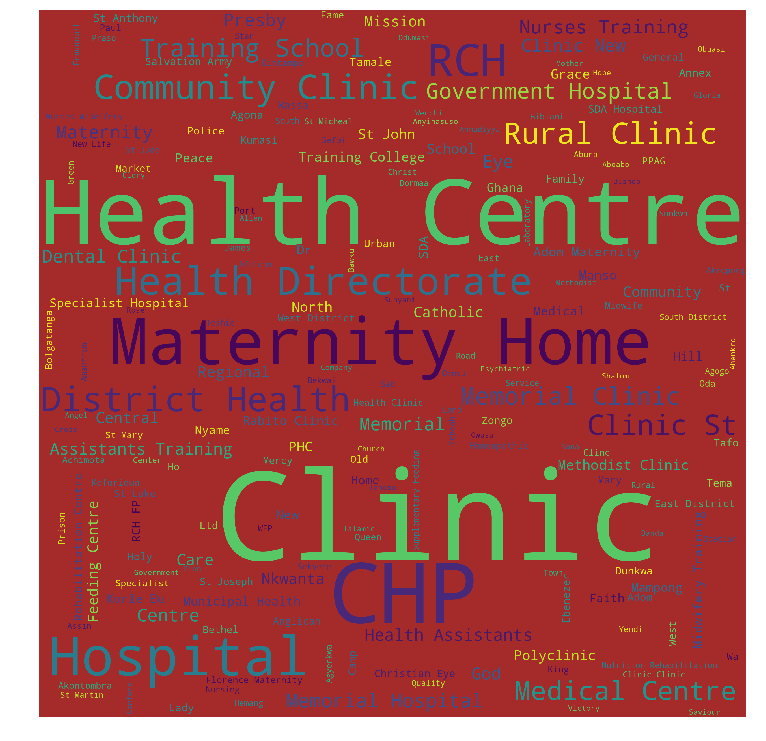

In [33]:
from wordcloud import WordCloud, STOPWORDS

def showWordCloud(data):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords = STOPWORDS,
                         background_color = 'brown',
                         width = 2500,
                         height = 2500
                         ).generate(cleaned_word)
    plt.figure(1,figsize = (13,13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

showWordCloud(Facility_Name)

In [34]:
Facility_Name = df['FacilityName'].dropna()

In [35]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [38]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(Facility_Name))

print(data_words[:1])

[['zion', 'clinic']]


In [39]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['zion', 'clinic']


In [40]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

#def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
def lemmatization(texts, allowed_postags=['NOUN']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [41]:
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN'])
#data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:4])

[['zion', 'clinic'], ['abenkyiman', 'clinic'], ['aboabo', 'health', 'centre'], ['health', 'centre']]


In [42]:
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1)]]


In [43]:
id2word[0]

'clinic'

In [44]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:3]]

[[('clinic', 1), ('zion', 1)],
 [('clinic', 1), ('abenkyiman', 1)],
 [('aboabo', 1), ('centre', 1), ('health', 1)]]

# LDA for FacilityName Data

In [45]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [46]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.231*"maternity" + 0.137*"home" + 0.037*"government" + 0.025*"adom" + '
  '0.024*"akontombra" + 0.022*"nkwanta" + 0.018*"presby" + 0.007*"nyame" + '
  '0.007*"glory" + 0.007*"lady"'),
 (1,
  '0.305*"health" + 0.268*"centre" + 0.041*"community" + 0.039*"directorate" + '
  '0.007*"nurse" + 0.006*"valley" + 0.005*"bekwai" + 0.005*"amenfi" + '
  '0.004*"kramokrom" + 0.004*"agona"'),
 (2,
  '0.340*"chps" + 0.088*"hospital" + 0.042*"rch" + 0.041*"district" + '
  '0.011*"camp" + 0.011*"prestea" + 0.007*"church" + 0.006*"annex" + '
  '0.004*"asikuma" + 0.004*"kofikrom"'),
 (3,
  '0.498*"clinic" + 0.008*"peace" + 0.006*"nyamegyeso" + 0.006*"pentecost" + '
  '0.006*"grace" + 0.005*"sda" + 0.005*"aid" + 0.005*"post" + 0.005*"odoye" + '
  '0.005*"jonna"'),
 (4,
  '0.053*"training" + 0.045*"school" + 0.023*"ghana" + 0.022*"phc" + '
  '0.021*"god" + 0.019*"damang" + 0.014*"kwabeng" + 0.014*"huniso" + '
  '0.013*"colleage" + 0.012*"clinc"')]


In [47]:
# Compute Model Perplexity and Coherence Score

In [48]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -5.555772777581841

Coherence Score:  0.6692254704024257


In [49]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.335193 -0.051911       1        1  33.736946
2      0.160353 -0.259199       2        1  23.294512
3      0.086640  0.244568       3        1  22.830763
0      0.051460  0.035930       4        1  12.751098
4      0.036740  0.030612       5        1   7.386681, topic_info=     Category        Freq            Term       Total  loglift  logprob
0     Default  926.000000          clinic  926.000000  30.0000  30.0000
12    Default  645.000000            chps  645.000000  29.0000  29.0000
5     Default  839.000000          health  839.000000  28.0000  28.0000
4     Default  736.000000          centre  736.000000  27.0000  27.0000
7     Default  240.000000       maternity  240.000000  26.0000  26.0000
15    Default  143.000000            home  143.000000  25.0000  25.0000
14    Default  167.000000        hospital  167.000000  24.0000  24.0000
28    Default  112.000000       community  112.000000  23.0000  23.0000
116   Default   80.000000             rch   80.000000  22.0000  22.0000
235   Default  108.000000     directorate  108.000000  21.0000  21.0000
101   Default   77.000000        district   77.000000  20.0000  20.0000
221   Default   32.000000        training   32.000000  19.0000  19.0000
45    Default   39.000000      government   39.000000  18.0000  18.0000
223   Default   27.000000          school   27.000000  17.0000  17.0000
13    Default   26.000000            adom   26.000000  16.0000  16.0000
1748  Default   25.000000      akontombra   25.000000  15.0000  15.0000
145   Default   23.000000         nkwanta   23.000000  14.0000  14.0000
19    Default   19.000000          presby   19.000000  13.0000  13.0000
303   Default   14.000000           ghana   14.000000  12.0000  12.0000
442   Default   14.000000             phc   14.000000  11.0000  11.0000
90    Default   13.000000             god   13.000000  10.0000  10.0000
1921  Default   12.000000          damang   12.000000   9.0000   9.0000
596   Default   22.000000            camp   22.000000   8.0000   8.0000
1840  Default   21.000000         prestea   21.000000   7.0000   7.0000
763   Default    9.000000         kwabeng    9.000000   6.0000   6.0000
1845  Default    8.000000          huniso    8.000000   5.0000   5.0000
1507  Default    8.000000        colleage    8.000000   4.0000   4.0000
416   Default    8.000000           clinc    8.000000   3.0000   3.0000
178   Default   15.000000           peace   15.000000   2.0000   2.0000
935   Default    7.000000      polyclinic    7.000000   1.0000   1.0000
...       ...         ...             ...         ...      ...      ...
223    Topic5   26.934443          school   27.623486   2.5802  -3.1064
303    Topic5   13.853954           ghana   14.551370   2.5564  -3.7712
442    Topic5   13.351103             phc   14.045053   2.5548  -3.8082
90     Topic5   12.458072             god   13.166913   2.5502  -3.8774
1845   Topic5    8.246200          huniso    8.934595   2.5253  -4.2900
1507   Topic5    8.059358        colleage    8.762408   2.5219  -4.3130
763    Topic5    8.302695         kwabeng    9.052282   2.5191  -4.2832
416    Topic5    7.435488           clinc    8.134602   2.5156  -4.3935
935    Topic5    7.002630      polyclinic    7.690604   2.5118  -4.4535
672    Topic5    6.906525         midwife    7.632114   2.5056  -4.4673
149    Topic5    6.472529           faith    7.166586   2.5036  -4.5322
224    Topic5    6.216544       assistant    6.905081   2.5004  -4.5726
1921   Topic5   11.155071          damang   12.451742   2.4955  -3.9879
1934   Topic5    5.826806             shs    6.515175   2.4938  -4.6373
1935   Topic5    5.826806         sickbay    6.515175   2.4938  -4.6373
1933   Topic5    5.826806          asanco    6.515175   2.4938  -4.6373
1925   Topic5    5.819765             chp    6.508387   2.4937  -4.6385
1924   Topic5    5.819765          amafia    6.5083

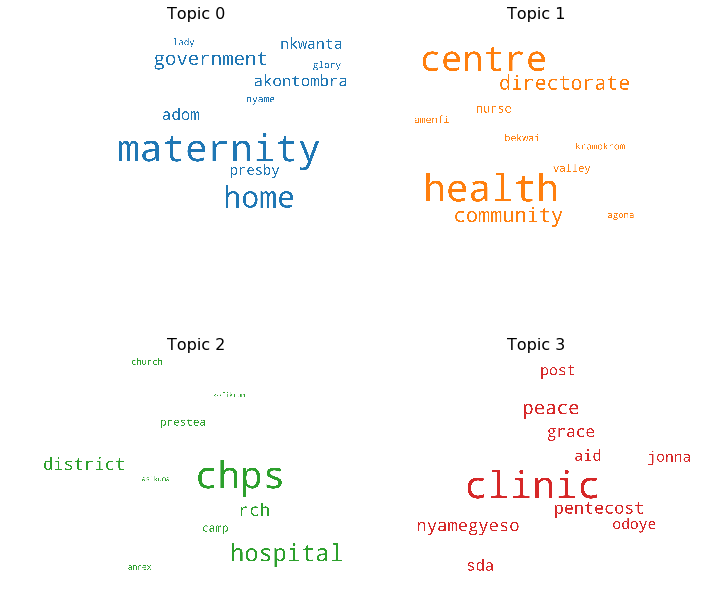

In [50]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# Hyperparameter Tuning - Number of Topics and Alpha

In [51]:
def compute_coherence_values(dictionary, corpus, texts, num_topics_range, alpha_range):
    
    coherence_values = []
    model_list = []
    for alpha in alpha_range:
        for num_topics in num_topics_range:
            lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=dictionary,
                                               num_topics=num_topics, 
                                               alpha=alpha,
                                               per_word_topics=True)
            model_list.append(lda_model)
            coherencemodel = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
            coherence_values.append((alpha, num_topics, coherencemodel.get_coherence()))
        

    return model_list, coherence_values

In [52]:
num_topics_range = [2, 6, 10, 15, 20]
alpha_range = [0.01, 0.1, 0.001]
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatized, 
                                                        num_topics_range=num_topics_range, 
                                                        alpha_range=alpha_range)

In [53]:
coherence_df = pd.DataFrame(coherence_values, columns=['alpha', 'num_topics', 'coherence_value'])
coherence_df

,alpha,num_topics,coherence_value
0,0.010,2,0.637534
1,0.010,6,0.634158
2,0.010,10,0.638440
3,0.010,15,0.649739
4,0.010,20,0.640613
5,0.100,2,0.633252
6,0.100,6,0.647575
7,0.100,10,0.633645
8,0.100,15,0.655950
9,0.100,20,0.650835


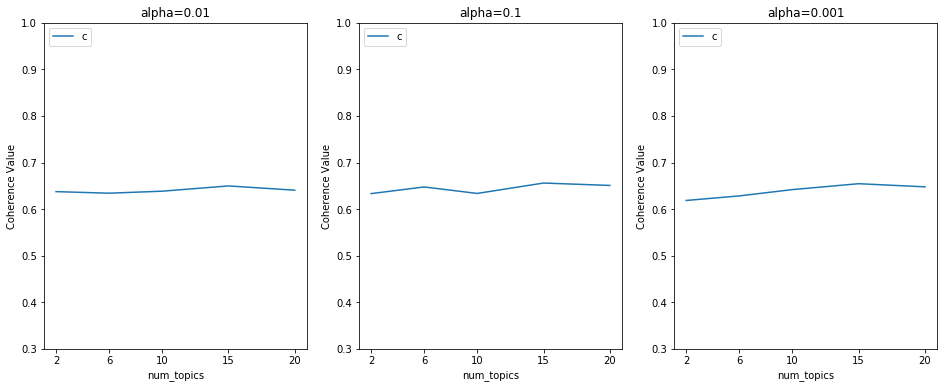

In [54]:
def plot_coherence(coherence_df, alpha_range, num_topics_range):
    plt.figure(figsize=(16,6))

    for i, val in enumerate(alpha_range):

        # subplot 1/3/i
        plt.subplot(1, 3, i+1)
        alpha_subset = coherence_df[coherence_df['alpha']==val]

        plt.plot(alpha_subset["num_topics"], alpha_subset["coherence_value"])
        plt.xlabel('num_topics')
        plt.ylabel('Coherence Value')
        plt.title("alpha={0}".format(val))
        plt.ylim([0.30, 1])
        plt.legend('coherence value', loc='upper left')
        plt.xticks(num_topics_range)

plot_coherence(coherence_df, alpha_range, num_topics_range)

In [55]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=15, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.1,
                                           per_word_topics=True)

In [56]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.001*"rch" + 0.001*"prestea" + 0.001*"camp" + 0.001*"akontombra" + '
  '0.001*"huniso" + 0.001*"damang" + 0.001*"phc" + 0.001*"polyclinic" + '
  '0.001*"annex" + 0.001*"clinc"'),
 (1,
  '0.430*"health" + 0.377*"centre" + 0.055*"directorate" + 0.024*"training" + '
  '0.021*"school" + 0.010*"nurse" + 0.005*"assistant" + 0.004*"mission" + '
  '0.004*"college" + 0.004*"nutrition"'),
 (2,
  '0.872*"chps" + 0.000*"hemang" + 0.000*"aidoosuazo" + 0.000*"kwasikrom" + '
  '0.000*"nyamegyeso" + 0.000*"kramokrom" + 0.000*"asikuma" + 0.000*"kofikrom" '
  '+ 0.000*"akurafu" + 0.000*"asoampa"'),
 (3,
  '0.076*"sda" + 0.000*"clinc" + 0.000*"anyinasuso" + 0.000*"wiamoase" + '
  '0.000*"apaa" + 0.000*"nobewam" + 0.000*"asamang" + 0.000*"anyinasu" + '
  '0.000*"konkoma" + 0.000*"rch"'),
 (4,
  '0.001*"rch" + 0.001*"prestea" + 0.001*"camp" + 0.001*"akontombra" + '
  '0.001*"huniso" + 0.001*"damang" + 0.001*"phc" + 0.001*"polyclinic" + '
  '0.001*"annex" + 0.001*"clinc"'),
 (5,
  '0.001*"rch" + 0.

In [57]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -10.557249641573602

Coherence Score:  0.6600113797382996


In [58]:
coherence_model_lda.get_coherence_per_topic()

[0.6858991574194957,
 0.5383005486387523,
 0.6811899552755178,
 0.6754287164042905,
 0.6858991574194957,
 0.6858991574194957,
 0.6227357522792536,
 0.6290861918598094,
 0.6861818287818063,
 0.6892298191744075,
 0.6526152821456634,
 0.693762327465277,
 0.6858991574194957,
 0.6193440926259993,
 0.6686995517457343]

In [59]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.395321  0.288753       1        1  23.919987
9      0.264593 -0.329507       2        1  14.964466
6      0.039453  0.004996       3        1   9.635164
7      0.011376  0.010637       4        1   8.156022
2      0.198567 -0.086178       5        1   7.981162
8     -0.096223  0.013788       6        1   3.826053
10    -0.096559  0.015030       7        1   3.750353
3     -0.091913  0.011255       8        1   3.571864
11    -0.090477  0.010650       9        1   3.570097
14    -0.091222  0.010956      10        1   3.513169
13    -0.088796  0.009998      11        1   3.473060
12    -0.088530  0.009906      12        1   3.409651
0     -0.088530  0.009906      13        1   3.409651
5     -0.088530  0.009906      14        1   3.409651
4     -0.088530  0.009906      15        1   3.409651, topic_info=     Category        Freq          Term       Total  loglift  logprob
0     Default  909.000000        clinic  909.000000  30.0000  30.0000
12    Default  568.000000          chps  568.000000  29.0000  29.0000
5     Default  839.000000        health  839.000000  28.0000  28.0000
4     Default  736.000000        centre  736.000000  27.0000  27.0000
7     Default  356.000000     maternity  356.000000  26.0000  26.0000
14    Default  289.000000      hospital  289.000000  25.0000  25.0000
15    Default  212.000000          home  212.000000  24.0000  24.0000
101   Default  134.000000      district  134.000000  23.0000  23.0000
45    Default   72.000000    government   72.000000  22.0000  22.0000
28    Default  114.000000     community  114.000000  21.0000  21.0000
13    Default   54.000000          adom   54.000000  20.0000  20.0000
235   Default  109.000000   directorate  109.000000  19.0000  19.0000
51    Default   23.000000           sda   23.000000  18.0000  18.0000
145   Default   32.000000       nkwanta   32.000000  17.0000  17.0000
20    Default   22.000000         agona   22.000000  16.0000  16.0000
19    Default   28.000000        presby   28.000000  15.0000  15.0000
170   Default   18.000000         nyame   18.000000  14.0000  14.0000
41    Default   17.000000           eye   17.000000  13.0000  13.0000
221   Default   49.000000      training   49.000000  12.0000  12.0000
178   Default   23.000000         peace   23.000000  11.0000  11.0000
8     Default   13.000000     methodist   13.000000  10.0000  10.0000
223   Default   41.000000        school   41.000000   9.0000   9.0000
54    Default   17.000000         grace   17.000000   8.0000   8.0000
303   Default   22.000000         ghana   22.000000   7.0000   7.0000
90    Default   20.000000           god   20.000000   6.0000   6.0000
89    Default   17.000000        church   17.000000   5.0000   5.0000
370   Default   10.000000    specialist   10.000000   4.0000   4.0000
301   Default   10.000000      florence   10.000000   3.0000   3.0000
220   Default   21.000000         nurse   21.000000   2.0000   2.0000
141   Default    7.000000       mampong    7.000000   1.0000   1.0000
...       ...         ...           ...         ...      ...      ...
1817  Topic15    0.142657          work    1.703806   0.8984  -7.5740
1809  Topic15    0.142657      essikadu    1.703806   0.8984  -7.5740
1812  Topic15    0.142657  kwesimintsim    1.703806   0.8984  -7.5740
1816  Topic15    0.142657        effman    1.703806   0.8984  -7.5740
1733  Topic15    0.142656          xavi    1.703800   0.8984  -7.5740
1721  Topic15    0.142656       agormor    1.703800   0.8984  -7.5740
1726  Topic15    0.142656         avevi    1.703800   0.8984  -7.5740
1736  Topic15    0.142656       asamasa    1.703800   0.8984  -7.5740
1707  Topic15    0.142656       macheri    1.703800   0.8984  -7.5740
1705  Topic15    0.142656      anyiremu    1.703800   0.8984  -7.5740
1720  Topic15    0.142656          peki    1.703800   0.8984  -7.5740
1706  Topic15    0.142656    

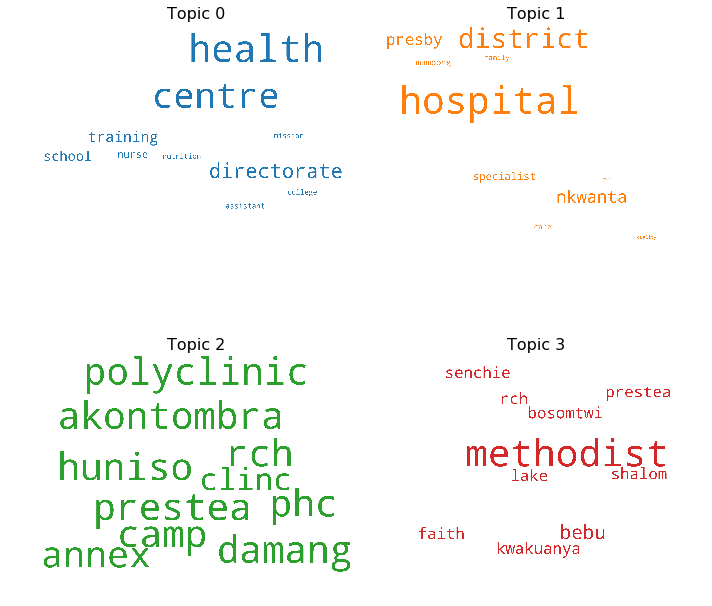

In [60]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()